# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
twitter_df = pd.read_csv("./twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

# fetch .tsv file from URL into a local file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url) # get data from url

with open('image-predictions.tsv', mode='wb') as file: 
    file.write(response.content)
    
    
image_df = pd.read_csv("./image-predictions.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# print("Starting now")

# api = tweepy.API(auth, wait_on_rate_limit=True)

# print("Authenticated")

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_df.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# print("File should be created now")
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except Exception as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
import json
tweets = []

with open('./tweet_json.txt') as f:
    for line in f:
        tweet = json.loads(line)
        tweets.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })

In [6]:

tweets_df = pd.DataFrame(tweets)
tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
image_df
#2075 rows × 12 columns
#tweet_id	
#jpg_url	
#img_num
#p1	
#p1_conf	
#p1_dog	
#p2	
#p2_conf	
#p2_dog	
#p3	
#p3_conf	
#p3_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
twitter_df
#2356 rows × 17 columns
#tweet_id	
#in_reply_to_status_id	
#in_reply_to_user_id	
#timestamp	
#source	
#text	
#retweeted_status_id
#retweeted_status_user_id	
#retweeted_status_timestamp	
#expanded_urls	
#rating_numerator	
#rating_denominator	
#name	
#doggo	
#floofer	
#pupper	
#puppo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
tweets_df
#2354 rows × 3 columns
#favorite_count	
#retweet_count	
#tweet_id

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Visual Assessments
-   Inconsistent representation of NaN (null values) we have None also as a representation.(#twitter_archive_enhanced table)
-   Remove all invalid names as they start with small letters
-   Inconsistent representation of data name (Small and big case-types of names) (#image_prediction table)
-   Underscore included in the names of Dogs (#image_prediction table)
-   There are data that are not dogs (#image_prediction table)

### ### Programatical Assessments 
-  It confirms the visual assessment that some names of dogs are not acurrate e.g "Unaccepted","mad"
-  (#correct Fwed to Fred, correct Billl to Bill, correct Joshwa to Joshua, correct Bobb to Bob, correct Jockson to Jackson)
-  Correct the denominators back to 10
-  we would analyse this data and correct some assuming they were typographical errors and inaccurate data 
-  a. since they are good dogs and the ratings are majorly above 10 and below 16 (i found out that on @weratedog's page the highest rating's for dogs is 15/10 which is named after their dog's foundation 15over10.)



In [10]:
twitter_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
twitter_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [12]:
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
image_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

### Quality issues
-  Inconsistent representation of NaN (null values) we have None also as a representation.(#twitter_archive_enhanced table)

-  Remove all invalid names as they start with small letters

-  Inconsistent representation of data name (Small and big case-types of names) (#image_prediction table)

-  Underscore included in the names of Dogs (#image_prediction table)

-  There are data that are not dogs (#image_prediction table)

-  (#correct Fwed to Fred, #correct Billl to Bill, #correct Joshwa to Joshua, #correct Bobb to Bob,#correct Jockson to Jackson)
-   Correct the denominators back to 10, #We can see wrong figures of denominator since the special rating system is over 10 and we have about 17 wrong denominator rating
-   we would analyse this data and correct some assuming they were typographical errors and inaccurate data #a. since they are good dogs and the ratings are majorly above 10 and below 16 (i found out that on @weratedog's page the highest rating's for dogs is 15/10 which is named after their dog's foundation 15outof10.)


### Tidiness issues
-  Twitter_archive_enhanced Table should have a seperate table for retweets and dog stages (Each type of observational unit forms a table)
 
-  Dog stages should be combined into a column, its just one variable (Each Variable forms a column)

-  Merge table together to for analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Making copies of original pieces of data
ta_df= twitter_df.copy()
ip_df= image_df.copy()
tw_df= tweets_df.copy()


### Issue #1:Twitter_archive_enhanced Table should have a seperate table for retweets (Each type of observational unit forms a table)

#### Define: Rename a new data Frame with the retweets column 


#### Code

In [15]:
retweet= ta_df[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]
#retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp	
retweet.dropna()

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
19,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
32,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000
36,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
68,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000
73,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000
...,...,...,...
1023,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000
1043,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000
1242,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000
2259,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000


#### Test

In [16]:
retweet

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2351,NaN,NaN,NaN
2352,NaN,NaN,NaN
2353,NaN,NaN,NaN
2354,NaN,NaN,NaN


### Issue #2: Remove the retweet rows and columns in the twitter archivedata

 #### Define: Drop the retweet rows and columns in the twitter archivedata

#### Code

In [17]:
ta_df = ta_df[pd.isnull(ta_df.retweeted_status_id)]
ta_df = ta_df[pd.isnull(ta_df.in_reply_to_status_id)]
ta_df.drop(ta_df.iloc[:,6:9] , inplace= True, axis=1)
#remove retweets from the twitter archive table
# run this cell once as running multiple times would remove some columns

#### Test

In [18]:
ta_df
# retweet has been removed from the twitter archive table

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #3:Dog stages should be combined into a column, its just one variable (Each Variable forms a column)

#### Define
- Name the new column and combine, pupper, doggo, puppo and floffer into the new column (Dog Stage)

#### Code

In [19]:

import numpy as np

ta_conditions =  [(ta_df['doggo'] != 'None'),(ta_df['floofer'] != 'None'),(ta_df['pupper'] != 'None'),(ta_df['puppo'] != 'None')]
ta_values = ['doggo','floofer','pupper','puppo']
    
ta_df['dog_stage'] = np.select(ta_conditions, ta_values, 'None')
#we create a column called dog stage that hs all the values of the dog type


In [20]:
ta_df.drop(ta_df.iloc[:,10:14] , inplace= True, axis=1)
#we drop doggo, popper, pupper and floffer columns

#### Test

In [21]:
ta_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None


### Issue #4: remove all invalid names as they start with small letters

#### Define

Remove all names starting with small letters as they are invalid

#### Code

In [22]:
ta_df.name.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
2097 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


In [23]:
ta_df.loc[ta_df['name'] == ta_df['name'].str.lower(), 'name'] = np.nan

ta_df.name.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
1993 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


#### Test

In [24]:
ta_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### Issue #5:(#correct Fwed to Fred, #correct Billl to Bill, #correct Joshwa to Joshua, #correct Bobb to Bob,#correct Jockson to Jackson and Josep to Joseph)

#### Define 
- Correct the spellings of a few names 

#### Code

In [25]:
ta_df.name = ta_df.name.replace('Fwed', 'Fred')
ta_df.name = ta_df.name.replace('Billl', 'Bill')
ta_df.name = ta_df.name.replace('Joshwa', 'Joshua')
ta_df.name = ta_df.name.replace('Bobb', 'Bob')
ta_df.name = ta_df.name.replace('Jockson', 'Jackson')
ta_df.name = ta_df.name.replace('Josep', 'Joseph')


#### Test

In [26]:
ta_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### Issue #6: Correct the denominators back to 10, #We can see wrong figures of denominator since the special rating system is over 10 and we have about 17 wrong denominator rating

#### Define
- From the special rating system we find that every dog was rated over 10
- Make all the denominator column over 10

#### Code

In [27]:
ta_df['rating_denominator'] = 10

#### Test

In [28]:
ta_df.rating_denominator.unique()

array([10], dtype=int64)

### Issue #7: Correct The Numerator column
- The maximum rating from @weratedogs is 15 ( which they named afteer their dog foundation '15out of 10'
- Checking through the rating's text, we found out that most dogs with rating below 5 were other pets not dogs 

#### Define
- Get rating numerator from 6 to 15
- First, Filter numerators with decimals

#### Code

In [30]:
filtered_decimals = ta_df[ta_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'tweet_id']]
x = filtered_decimals.tweet_id.tolist()
x

for item in x:
    ta_df = ta_df.drop(ta_df.index[ta_df.tweet_id == item])
    

ta_df
#Filter numerators with decimals

C:\Users\IJ\AppData\Local\Temp\ipykernel_2608\4094821122.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_decimals = ta_df[ta_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'tweet_id']]


[883482846933004288,
 786709082849828864,
 778027034220126208,
 680494726643068929]

In [31]:
ta_df = ta_df[(ta_df['rating_numerator'] > 5) & (ta_df['rating_numerator'] <= 15)]

ta_df.rating_numerator.unique()

array([13, 12, 14, 11,  6, 10,  7,  8,  9], dtype=int64)

#### Test

In [32]:
ta_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #8:  There are data that are not dogs (#image_prediction table)

#### Define
- Filter out only Dogs information

#### Code

In [33]:
ip_df['is_dog'] = np.where((ip_df['p1_dog'] == True) & (ip_df['p1_dog'] == ip_df['p2_dog']) & (ip_df['p1_dog'] == ip_df['p3_dog']), True, False)

ip_df =ip_df.loc[ip_df['is_dog'] == True]



#### Test

In [34]:
ip_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'miniature_poodle', 'golden_retriever',
       'Gordon_setter', 'Walker_hound', 'pug', 'bloodhound', 'Lhasa',
       'English_setter', 'Italian_greyhound', 'Maltese_dog', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Chesapeake_Bay_retriever', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Rottweiler',
       'Siberian_husky', 'papillon', 'Saint_Bernard', 'Tibetan_terrier',
       'beagle', 'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'chow',
       'standard_poodle', 'Staffordshire_bullterrier', 'basenji',
       'Lakelan

### Issue #9:  Inconsistent representation of data name (Small and big case-types of names) (#image_prediction table)


#### Define
- Set these name cases to be title cases

#### Code

In [35]:
ip_df.p1= ip_df.p1.str.title()
ip_df.p2= ip_df.p2.str.title()
ip_df.p3= ip_df.p3.str.title()

#### Test

In [36]:
ip_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_Terrier,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,True


### Issue #10: Underscore included in the names of Dogs (#image_prediction table)

#### Define
- Remove the underscores included in the names of dogs 

#### Code

In [37]:
ip_df.p1 = ip_df.p1.str.replace('_', ' ')
ip_df.p2 = ip_df.p2.str.replace('_', ' ')
ip_df.p3 = ip_df.p3.str.replace('_', ' ')

#### Test

In [38]:
ip_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,True


### Issue 11: Inconsistent representation of NaN (null values) we have None also as a representation.(#twitter_archive_enhanced table)

#### Define
- Replace inconsistent NaN value in Name column and Dogstage column

#### Code

In [39]:
ta_df['dog_stage'].replace('None', np.NaN, inplace= True)
ta_df['name'].replace('None', np.NaN, inplace= True)


#### Test

In [40]:
ta_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


### Issue #12:  Finally, create a new table for the tweeter_id,namesof dogs, dog_stages ,numerator, favourite count and retweets

#### Define
- Create a new table for the tweeter_id,namesof dogs, dog_stages , favourite count and retweets for analysis

#### Code

In [41]:
merge_1 = pd.merge(ip_df, ta_df, on=['tweet_id'], how='left')

In [42]:
merge_2 = pd.merge(merge_1, tw_df, on=['tweet_id'], how='left')

In [43]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1243 non-null   int64  
 1   jpg_url                1243 non-null   object 
 2   img_num                1243 non-null   int64  
 3   p1                     1243 non-null   object 
 4   p1_conf                1243 non-null   float64
 5   p1_dog                 1243 non-null   bool   
 6   p2                     1243 non-null   object 
 7   p2_conf                1243 non-null   float64
 8   p2_dog                 1243 non-null   bool   
 9   p3                     1243 non-null   object 
 10  p3_conf                1243 non-null   float64
 11  p3_dog                 1243 non-null   bool   
 12  is_dog                 1243 non-null   bool   
 13  in_reply_to_status_id  0 non-null      float64
 14  in_reply_to_user_id    0 non-null      float64
 15  time

In [44]:
merged_tables = merge_2.drop(merge_2.iloc[:, 1:19], axis=1)

merged_tables

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,8.0,10.0,NaN,NaN,532.0,2535.0
1,666029285002620928,7.0,10.0,NaN,NaN,48.0,132.0
2,666033412701032449,9.0,10.0,NaN,NaN,47.0,128.0
3,666044226329800704,6.0,10.0,NaN,NaN,147.0,311.0
4,666049248165822465,NaN,NaN,NaN,NaN,41.0,111.0
...,...,...,...,...,...,...,...
1238,890609185150312448,13.0,10.0,Zoey,NaN,4429.0,28226.0
1239,890729181411237888,13.0,10.0,NaN,NaN,16716.0,56848.0
1240,891327558926688256,12.0,10.0,Franklin,NaN,9774.0,41048.0
1241,891815181378084864,12.0,10.0,Archie,NaN,4328.0,25461.0


#### Test

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
merged_tables.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [46]:
merged_tables.name.unique()

array([nan, 'Walter', 'Scout', 'Kreggory', 'Jimothy', 'Christoper',
       'Lugan', 'Jackson', 'Jeph', 'Keet', 'Dave', 'Clybe', 'Gabe',
       'Pipsy', 'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison',
       'Joshua', 'Genevieve', 'Fred', 'Biden', 'Cupcake', 'Reese', 'Hall',
       'Dook', 'Naphaniel', 'Frank', 'Kial', 'Olive', 'Erik',
       'Cleopatricia', 'Alfie', 'Skittles', 'Ron', 'Bisquick', 'Sophie',
       'Rusty', 'Jo', 'Gòrdón', 'Spark', 'Marvin', 'Timofy', 'Winifred',
       'Banditt', 'Bob', 'Ruffles', 'Lambeau', 'Herald', 'Jeremy', 'Chaz',
       'Terrance', 'Samsom', 'Clarq', 'Kirk', 'Dug', 'Saydee', 'Chip',
       'Oliviér', 'Bill', 'Ronduh', 'Kollin', 'Linda', 'Shawwn', 'Kloey',
       'Andru', 'Julio', 'Raphael', 'Ben', 'Liam', 'Winston', 'Wally',
       'Sandra', 'Butters', 'Daisy', 'Larry', 'Nigel', 'Scooter', 'Willy',
       'Koda', 'Paull', 'Bloo', 'Pluto', 'Danny', 'Gin', 'Trigger',
       'Mason', 'Andy', 'Maggie', 'Sage', 'Remington', 'Toby', 'Holly',
   

In [47]:
merged_tables.rating_numerator.unique()

array([ 8.,  7.,  9.,  6., nan, 10., 11., 12., 13., 14.])

### Insights:

1. From the data above, there are still a lot to clean e.g. correct names, missing values. Also wrong names e.g not, very, just, Thumas etc.  

2. From the image prediction we were able to sort out dogs only which we merged with the rating data set, and this has provided a bit of an accurate data (meaning we are dealing with dogs only) even though we have some missing data in the names column, Any dog can bear any name , but not to corrupt the data we have by replacing wrong names with actual names we set it to null,(since they are subjective) which is why there are a lot of missing names. The quantitative aspects can help us out with our visualization

3. Knowing the special Rating system has a denominator of 10, we set all denominators to 10.. For numerators, its tricky as figured on the twitter page of @werate dogs that their highest rating has been 15 out of 10, which is the name for their foundation, we selected all data within 5 and 16 that is 6-15, we did not include 5-1, we figured that most of the ratings below 6 were other items and pets that were not dogs, and knowing that they responded to Brent telling him that they rate most dogs above 10 because "they are good dogs Brent". We decided to stick to this range to filter non-dog data
.

### Visualization

Text(0.5, 1.0, 'Rating Against Retweet counts')

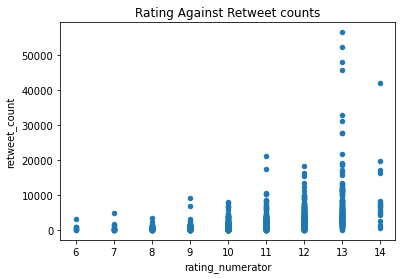

In [48]:
#Using scatter plot, we would be checking on how the numerator rating correlates with the retweet and favorite counts
%matplotlib inline
from matplotlib import pyplot as plt

# Creating a function to render scatter plots
def scatter(x_axis, y_axis, data):
    data.plot(x = x_axis, y = y_axis, kind = 'scatter')
scatter('rating_numerator', 'retweet_count', merged_tables)
plt.title('Rating Against Retweet counts')


Text(0.5, 1.0, 'Rating Against Favorite counts')

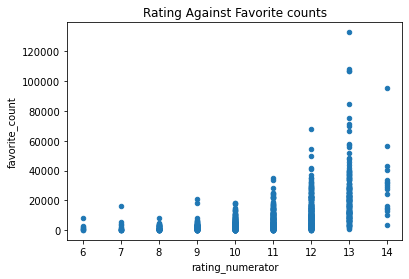

In [49]:
scatter('rating_numerator', 'favorite_count', merged_tables)
plt.title('Rating Against Favorite counts')


#### From the above graph we clearly see a strong correlation between the ratings and the Retweet also a strong correlation between the ratings and the Favourite counts 
- Most good dogs that have a 13 ratings also attracts high retweet and high Favourite count

### References:
-  www.google.com
-  https://www.geeksforgeeks.org
-  https://twitter.com/dog_rates
-  https://twitter.com